# SECOND PART

## Importing datasets

In [81]:
import pandas as pd
echonest = pd.read_csv('data/datasets/echonest.csv')
features = pd.read_csv('data/datasets/features.csv')
tracks = pd.read_csv('data/datasets/tracks.csv')

In [82]:
# give a look to the data
'''
echonest
features
tracks
print(list(echonest.columns)[0:26])
print(list(features.columns)[0:26])
print(list(tracks.columns))
print(tracks.isnull().sum().to_string())

''';

Let's check if the dataset are subsets of each other before merging them together

In [83]:
track_set = set(tracks['track_id'])
echonest_set = set(echonest['track_id'])
features_set = set(features['track_id'])


In [84]:
print('is echonest subset of track?',echonest_set.issubset(track_set))
print('lenght of intersection between track and echonest:',len(track_set.intersection(echonest_set)))
print('lenght of echonest:',len(echonest_set))
print('track is equal to features?',track_set == features_set)

is echonest subset of track? True
lenght of intersection between track and echonest: 13129
lenght of echonest: 13129
track is equal to features? True


Ok, we can finally merge the datasets

In [85]:
temp = pd.merge(echonest, features, on = 'track_id')
df= pd.merge(temp, tracks, on = 'track_id')
df

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,NaN,1126,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,NaN,5,NaN,[],Street Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,NaN,20996,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,13365,NaN,8,NaN,[],I'm Wearing My Dancing Pants
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,NaN,4501,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,3588,NaN,9,NaN,[],Me Funky You Jane
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,NaN,3641,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,2956,NaN,10,NaN,[],Ain't Mad at Ya
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,NaN,3960,NaN,Attribution-Noncommercial-Share Alike 3.0 Unit...,3126,NaN,11,NaN,[],This Is Not the End


In [86]:
df1=df

Now we can give a look to the new dataset

In [87]:
'''
for col in merged.columns:
    print(col)
''';


# Part 2.2: Choose your features (variables)

## Select one method for dimensionality reduction

Our choice is to perform an PCA 

GOAL: 
 1. reduce the dimensionality  keeping the features that preserve the most of the variance, which means to reduce the noise induced by the other features
 
LIMITATIONS: 
1. Low intepretability of principal features
2.  trade-off between dimensionality reduction and information loss

ASSUMPTIONS:
1. PCA assumes a correlation between features
2. PCA is sensitive to the scale of features
3. PCA is not robust to outliers
4. PCA assumes a linear relationship between features
5. The implementation requires no missing values

### Retrieve general informations about the data

In [88]:

df['track_title'] = df['track_title'].fillna('-')
df['track_language_code'] = df['track_language_code'].fillna('-')
df['metadata_artist_location'] = df['metadata_artist_location'].fillna('-')
df['artist_date_created'] = df['artist_date_created'].fillna('-')
df['album_type'] = df['album_type'].fillna('-')
df['metadata_artist_latitude'] = df['metadata_artist_latitude'].fillna('-')
df['metadata_artist_longitude'] = df['metadata_artist_longitude'].fillna('-')

Let's give a look to our dataframe and its proprerty

In [89]:
info = pd.DataFrame([df.columns, df.dtypes, df.isna().sum()], ['Column', 'dtype', 'NumOfNA']).T
info

,Column,dtype,NumOfNA
0,track_id,int64,0
1,audio_features_acousticness,float64,0
2,audio_features_danceability,float64,0
3,audio_features_energy,float64,0
4,audio_features_instrumentalness,float64,0
...,...,...,...
815,track_lyricist,object,13055
816,track_number,int64,0
817,track_publisher,object,12977
818,track_tags,object,0


We eliminate columns with Nan values

In [90]:
df.dropna(axis=1, how='any', inplace=True)
print('dataframe shape',df.shape)
df.describe()

dataframe shape (13129, 790)


,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,...,artist_comments,artist_favorites,artist_id,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,...,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,1.312900e+04,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,0.321996,...,1.546119,19.630589,6303.865641,248580.807068,0.044558,249.013558,4.310305,3.784447e+03,2147.068703,5.608500
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,0.114619,...,4.958391,66.047980,4974.103114,63834.230395,0.494095,207.268166,20.884705,3.396744e+04,9434.471644,6.108004
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,0.000000,...,-1.000000,-1.000000,1.000000,-1.000000,0.000000,18.000000,0.000000,6.300000e+01,12.000000,0.000000
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,0.254517,...,0.000000,2.000000,2203.000000,192000.000000,0.000000,156.000000,0.000000,6.700000e+02,299.000000,2.000000
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,0.328672,...,0.000000,6.000000,5442.000000,256000.000000,0.000000,214.000000,1.000000,1.351000e+03,694.000000,4.000000
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,0.414481,...,1.000000,15.000000,9288.000000,320000.000000,0.000000,282.000000,4.000000,2.948000e+03,1714.000000,8.000000
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,0.667799,...,68.000000,963.000000,20818.000000,448000.000000,37.000000,3033.000000,1482.000000,3.293557e+06,543252.000000,213.000000


Let's retrieve and collect some general informations before going to PCA 

In [91]:
gen_info = df.iloc[:, 761:]
gen_info['metadata_artist_location'] = df['metadata_artist_location']
gen_info['metadata_artist_latitude'] = df['metadata_artist_latitude']
gen_info['metadata_artist_longitude'] = df['metadata_artist_longitude']
gen_info['track_id'] = df['track_id']
gen_info = gen_info[[gen_info.columns[-1]]+list(gen_info.columns[:-1])]
gen_info

,track_id,album_comments,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,artist_comments,...,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_tags,track_title,metadata_artist_location,metadata_artist_latitude,metadata_artist_longitude
0,2,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,[21],4656,en,1293,3,[],Food,"Georgia, US",32.6783,-83.223
1,3,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,[21],1470,en,514,4,[],Electric Ave,"Georgia, US",32.6783,-83.223
2,5,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,[21],1933,en,1151,6,[],This World,"Georgia, US",32.6783,-83.223
3,10,0,4,6,47632,[],Constant Hitmaker,2,Album,3,...,[10],54881,en,50135,1,[],Freeway,"Philadelphia, PA, US",39.9523,-75.1624
4,134,0,4,1,6073,[],AWOL - A Way Of Life,7,Album,0,...,[21],1126,en,943,5,[],Street Music,"Georgia, US",32.6783,-83.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,"[542, 21, 286, 15]",20996,-,13365,8,[],I'm Wearing My Dancing Pants,Netherlands,52.1082,5.32986
13125,124862,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,"[542, 21, 286, 15]",4501,-,3588,9,[],Me Funky You Jane,Netherlands,52.1082,5.32986
13126,124863,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,"[542, 21, 286, 15]",3641,-,2956,10,[],Ain't Mad at Ya,Netherlands,52.1082,5.32986
13127,124864,0,0,18862,55904,[],Do You Know The Word,14,Album,0,...,"[542, 21, 286, 15]",3960,-,3126,11,[],This Is Not the End,Netherlands,52.1082,5.32986


## Principal Component Analysis

Now let's focus on quantitative variables

In [92]:
sound_info = df.iloc[:, 1:761]
sound_info

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_latitude,metadata_artist_location,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,32.6783,"Georgia, US",...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,32.6783,"Georgia, US",...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,32.6783,"Georgia, US",...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,39.9523,"Philadelphia, PA, US",...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,32.6783,"Georgia, US",...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,52.1082,Netherlands,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,52.1082,Netherlands,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,52.1082,Netherlands,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,52.1082,Netherlands,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


 Dropping the columns with non-numeric datatypes to be able to apply PCA

In [93]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sound_info = sound_info.select_dtypes(include=numerics)
sound_info

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,0.430808,0.456871,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,0.430808,0.456871,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,0.430808,0.456871,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,0.430808,0.456871,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


It's time for PCA

In [94]:
from sklearn.decomposition import PCA
pca = PCA(.70)

scaling data

In [95]:

x = pca.fit_transform(sound_info)

In [96]:
new_sound_info = pd.DataFrame(x, columns=['audio_feature_' + str(i) for i in range(len(x[0]))])
new_sound_info['track_id'] = df['track_id']
new_sound_info

,audio_feature_0,audio_feature_1,audio_feature_2,track_id
0,-816.840302,1176.719466,-504.123434,2
1,-1425.837812,1711.007971,-82.848599,3
2,-989.397977,533.225066,-304.797940,5
3,-2165.351686,-200.771438,304.073508,10
4,2555.920203,-156.929590,-782.675081,134
...,...,...,...,...
13124,-1143.966342,1477.307094,-1025.390987,124857
13125,2422.445985,435.279049,-594.550025,124862
13126,-571.045206,1143.535935,-219.442621,124863
13127,-386.140867,754.660071,785.895160,124864


 We wanto to check if you reach > 70% of the toal variance

In [97]:
print(pca.explained_variance_ratio_)
# overall varience
print('variance obtained:',sum(pca.explained_variance_ratio_))

[0.4303487  0.20541179 0.1080277 ]
variance obtained: 0.7437881932076242


We can merge the dataset obtained with PCA with the one of general information

In [98]:
df = pd.merge(gen_info, new_sound_info, on='track_id')
df.describe()

,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number,audio_feature_0,audio_feature_1,audio_feature_2
count,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,1.312900e+04,13129.000000,13129.000000,1.312900e+04,1.312900e+04,1.312900e+04
mean,34031.058268,0.348770,1.670805,6434.838982,21288.982710,12.406505,1.546119,19.630589,6303.865641,248580.807068,0.044558,249.013558,4.310305,3.784447e+03,2147.068703,5.608500,-9.152791e-15,3.886949e-13,-1.109765e-13
std,28950.422182,1.186648,3.073932,4513.861075,52361.334813,12.093782,4.958391,66.047980,4974.103114,63834.230395,0.494095,207.268166,20.884705,3.396744e+04,9434.471644,6.108004,2.653976e+03,1.833578e+03,1.329702e+03
min,2.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,18.000000,0.000000,6.300000e+01,12.000000,0.000000,-4.904794e+03,-5.182044e+03,-1.304769e+04
25%,12986.000000,0.000000,0.000000,3036.000000,2918.000000,6.000000,0.000000,2.000000,2203.000000,192000.000000,0.000000,156.000000,0.000000,6.700000e+02,299.000000,2.000000,-1.823436e+03,-1.251100e+03,-5.821962e+02
50%,28097.000000,0.000000,1.000000,5972.000000,6653.000000,10.000000,0.000000,6.000000,5442.000000,256000.000000,0.000000,214.000000,1.000000,1.351000e+03,694.000000,4.000000,-5.541058e+02,-2.120370e+02,5.998177e+01
75%,45021.000000,0.000000,2.000000,8697.000000,17382.000000,15.000000,1.000000,15.000000,9288.000000,320000.000000,0.000000,282.000000,4.000000,2.948000e+03,1714.000000,8.000000,1.107021e+03,1.059050e+03,5.809503e+02
max,124911.000000,17.000000,40.000000,18873.000000,808021.000000,164.000000,68.000000,963.000000,20818.000000,448000.000000,37.000000,3033.000000,1482.000000,3.293557e+06,543252.000000,213.000000,2.339050e+04,1.092260e+04,1.776545e+04


We have achieved our goal by reducing the space to just 36 columns oh which 33 are general informations 

## Visual representation

In this section we implent the representation using the covariance matrix

To follow the hyphotesis, we remove Nan values

In [99]:

df1.dropna(axis=1, how='any', inplace=True)



In [100]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

sound_info = df1.iloc[:, 1:761]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sound_info = sound_info.select_dtypes(include=numerics)
sound_info


,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,0.430808,0.456871,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,0.430808,0.456871,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,0.430808,0.456871,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,0.430808,0.456871,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


In [101]:
#pca=PCA(0.7)
from sklearn.decomposition import PCA
pca=PCA()
x = pca.fit_transform(sound_info)
x

array([[-8.16840302e+02,  1.17671947e+03, -5.04123434e+02, ...,
         3.01880292e-10, -1.68728906e-08, -2.62315002e-17],
       [-1.42583781e+03,  1.71100797e+03, -8.28485990e+01, ...,
        -2.42348104e-08, -5.30491039e-09,  1.75182009e-17],
       [-9.89397977e+02,  5.33225066e+02, -3.04797940e+02, ...,
        -1.59234538e-08, -9.91809808e-09, -4.29200965e-18],
       ...,
       [-5.71045206e+02,  1.14353594e+03, -2.19442621e+02, ...,
        -4.38359810e-09, -1.46792415e-08,  1.86261383e-19],
       [-3.86140867e+02,  7.54660071e+02,  7.85895160e+02, ...,
        -1.40977906e-09, -2.11504541e-08, -3.86856080e-18],
       [ 7.04772461e+02, -3.48690824e+03, -1.60402288e+02, ...,
         1.33698096e-08, -2.25275230e-09,  5.77776181e-18]])

We retrieve the covariance matrix with out number of components (755)

In [102]:
covar_matrix = PCA(n_components = 755)

In [103]:
import numpy as np
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var#cumulative sum of variance explained with [n] features

array([43. , 63.5, 74.3, 83.5, 90.5, 92. , 93.4, 94.6, 95.6, 96.5, 97. ,
       97.4, 97.7, 98. , 98.3, 98.5, 98.7, 98.9, 99. , 99.1, 99.2, 99.3,
       99.4, 99.5, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99

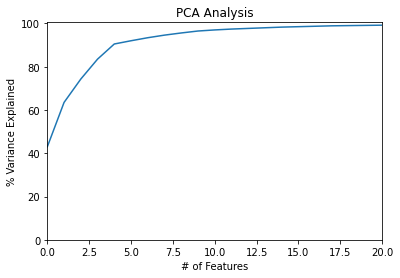

In [104]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.xlim([0, 20])
plt.style.context('seaborn-whitegrid')


plt.plot(var)